## Import the relevant libraries

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
sns.set()

#Machine Learning
from sklearn.metrics import roc_curve, auc 
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load the data

In [312]:
Raw_Data = pd.read_csv("heart.csv")

In [313]:
print(Raw_Data.shape)
Raw_Data.head()

(303, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [314]:
Raw_Data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [315]:
Raw_Data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* No NaN Values in DataSet
* No Data Cleansing needed

## Explore the Data

In [316]:
# Rename the columns for better understanding
Raw_Data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

In [317]:
pp.ProfileReport(Raw_Data, title = ' Profiling Report', html = {'style':{'full_width': True}})

## Analyse Feature in Dependence on the Target Variable

In [318]:
#Separate Categorical and Numerical Features
Numerical_Feature = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved',
                     'st_depression','number_major_vessels']
Categorical_Feature = ['sex', 'chest_pain_type','fasting_blood_sugar','rest_ecg', 'exercise_induced_angina','st_slope','thalassemia']
print("Numerical:", len(Numerical_Feature))
print("Categorical:",len(Categorical_Feature))
#Df without Features

Numerical: 6
Categorical: 7


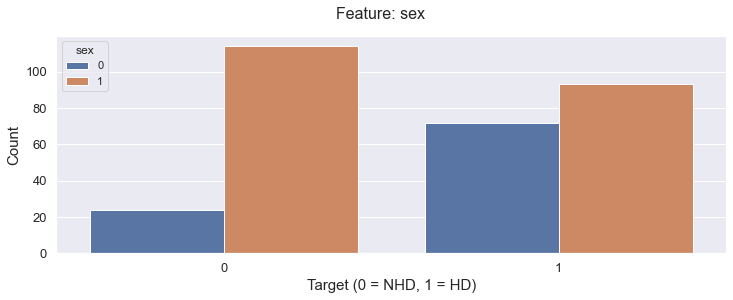

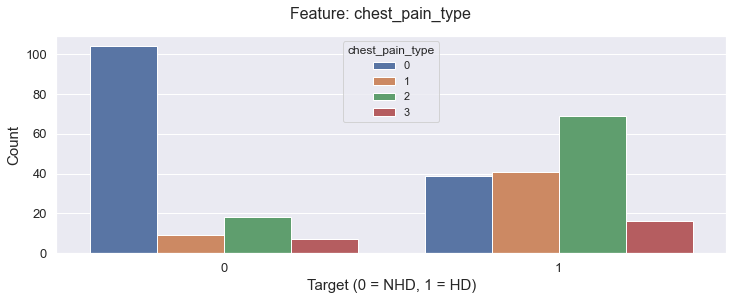

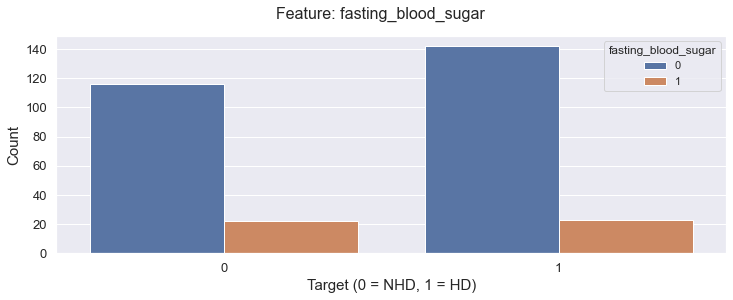

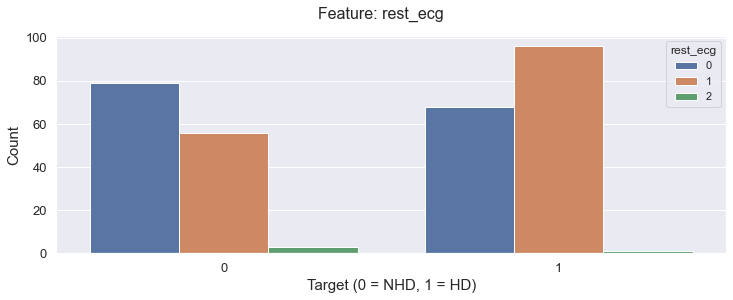

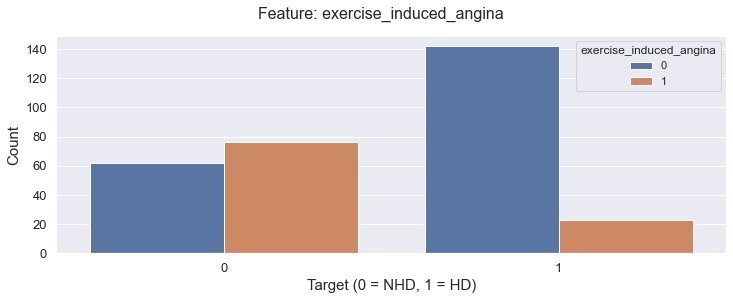

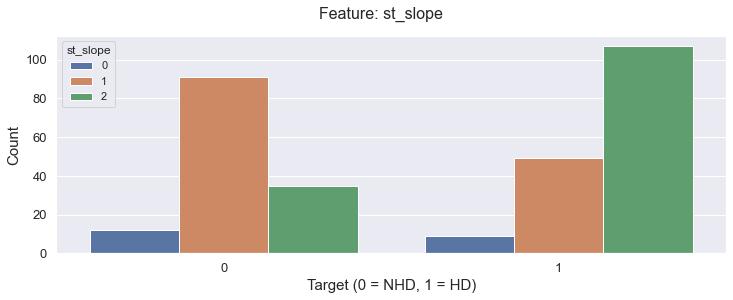

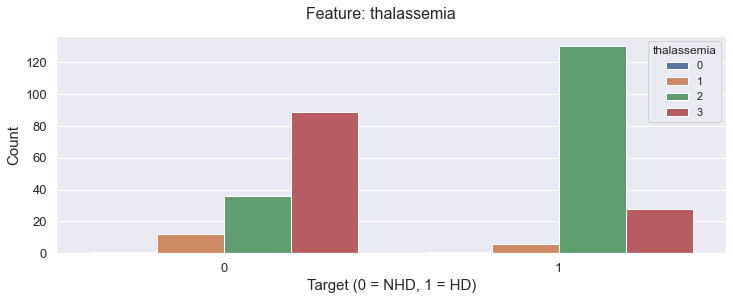

In [319]:
#Classes: HD = Heart Diesease, NHD = No Heart Disease
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(Categorical_Feature)):
      title = "Feature: " + Categorical_Feature[i] 
      plt.figure(figsize=(12,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.countplot(x="target",hue=Categorical_Feature[i], data=Raw_Data)
      #Size of ticks and Labels
      ax.set_xlabel('Target (0 = NHD, 1 = HD)', fontsize = Label_Size)
      ax.set_ylabel('Count', fontsize = Label_Size)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.show()


* More People with Chest Pain type(1,2,3) have HD
* Exercise_induced_angina could be an Indicator for HD (No -> NHD)
* More People with Thalassemia = 2 (fixed defect) have HD

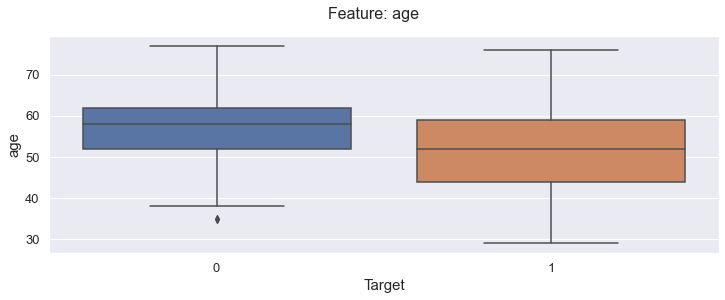

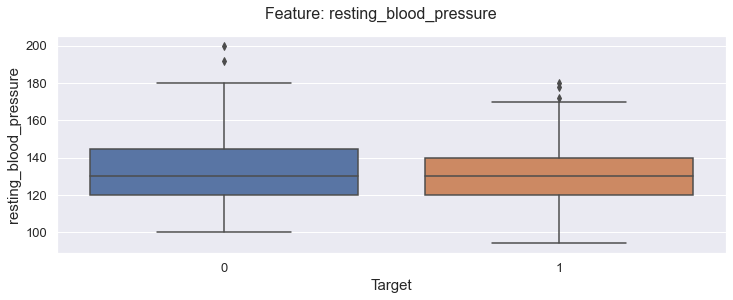

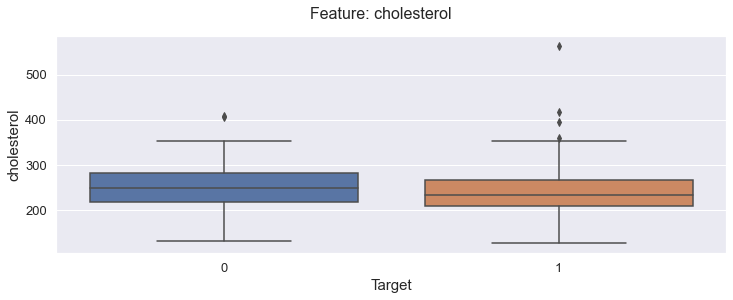

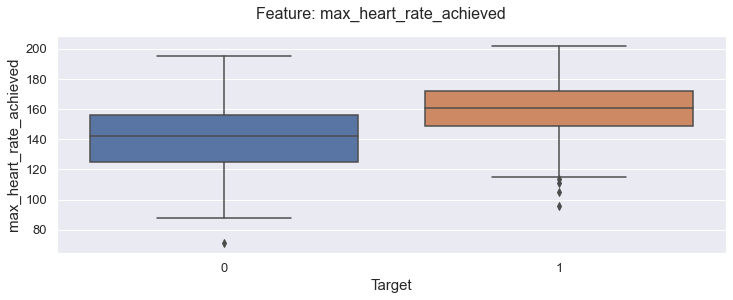

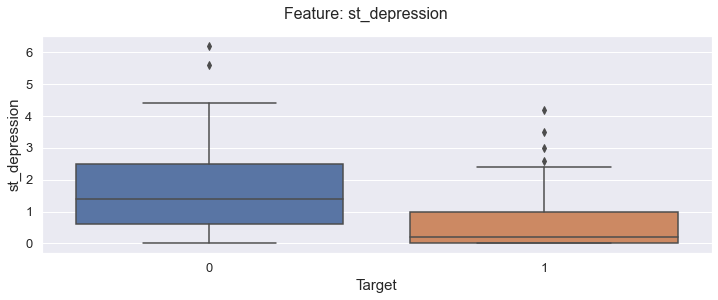

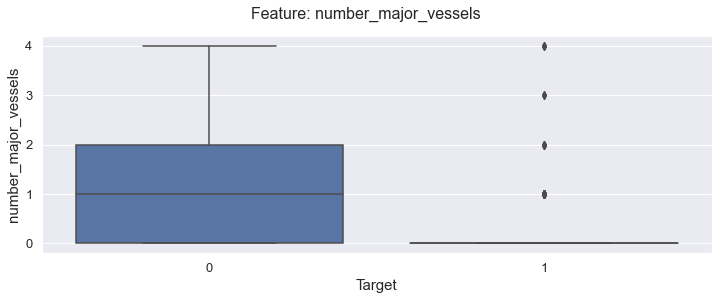

In [320]:
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(Numerical_Feature)):
      title = "Feature: " + Numerical_Feature[i] 
      plt.figure(figsize=(12,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.boxplot(x="target", y=Numerical_Feature[i], data=Raw_Data)
      #Size of ticks and Labels
      ax.set_xlabel('Target', fontsize = Label_Size)
      ax.set_ylabel( Numerical_Feature[i], fontsize = Label_Size)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.show()


* More younger people have HD (?)
* An higher max_heart_rate_achieved seems to have an Influence on HD
* More People with Thalassemia = 2 (fixed defect) have HD
* The higher the feature st_depression, the lower the probability for HD

In [321]:
#Create Dummy Variables for Categorical Values chest_pain_type, thalassemia, st_slope
Df_Dummy = Raw_Data.copy()

a = pd.get_dummies(Raw_Data['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(Raw_Data['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(Raw_Data['st_slope'], prefix = "st_slope")

frames = [Df_Dummy, a, b, c]
Df_Dummy = pd.concat(frames, axis = 1)
Df_Dummy.head()




age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  ...  chest_pain_type_1  \
0                        0            2.3  ...                  0   
1                        0            3.5  ...                  0   
2                        0            1.4  ...                  1   
3                        0            0.8  ...                  1   
4                        1            0.6  ...                  0   

   chest_pain_type_2  chest_pain_type_3  thalassemia_0  thalassemia_1  \
0                  0                  1              0              1   
1                  1                  0              0              0   
2                  0                  0              0              0   
3                  0                  0              0              0   
4                  0                  0              0              0   

   thalassemia_2  thalassemia_3  st_slope_0  st_slope_1  st_slope_2  
0              0              0           1           0           0  
1              1              0           1           0           0  
2              1              0           0           0           1  
3              1              0           0           0           1  
4              1              0           0           0           1  

[5 rows x 25 columns]

In [322]:
#drop categorical features, which were replaced by dummy variables
Df_Dummy = Df_Dummy.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
Df_Dummy.head()



age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   rest_ecg  max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0         0                      150                        0            2.3   
1         1                      187                        0            3.5   
2         0                      172                        0            1.4   
3         1                      178                        0            0.8   
4         1                      163                        1            0.6   

   number_major_vessels  ...  chest_pain_type_1  chest_pain_type_2  \
0                     0  ...                  0                  0   
1                     0  ...                  0                  1   
2                     0  ...                  1                  0   
3                     0  ...                  1                  0   
4                     0  ...                  0                  0   

   chest_pain_type_3  thalassemia_0  thalassemia_1  thalassemia_2  \
0                  1              0              1              0   
1                  0              0              0              1   
2                  0              0              0              1   
3                  0              0              0              1   
4                  0              0              0              1   

   thalassemia_3  st_slope_0  st_slope_1  st_slope_2  
0              0           1           0           0  
1              0           1           0           0  
2              0           0           0           1  
3              0           0           0           1  
4              0           0           0           1  

[5 rows x 22 columns]

## Separate Training and Testing Data

In [323]:
#get features
Df_Feature = Df_Dummy.loc[:, Df_Dummy.columns != "target"]
#convert to np.array
X = np.array(Df_Feature)
y = np.array(Df_Dummy["target"])
print(X.shape)
print(y.shape)

(303, 21)
(303,)


In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40, stratify=y)

X_train.shape

(242, 21)

In [325]:
#Check for Class Balance in Dataset
print("Training Data - Samples:", len(y_train))
print("Class 1:", np.count_nonzero(y_train))
print("Class 0:", np.count_nonzero(y_train == 0))
print("Balance:")
print(np.count_nonzero(y_train)/len(y_train), "%")
print("\nTest Data - Samples:",len(y_test))
print("Class 1:", np.count_nonzero(y_test))
print("Class 0:", np.count_nonzero(y_test == 0))
print("Balance:")
print(np.count_nonzero(y_test)/len(y_test), "%")

Training Data - Samples: 242
Class 1: 132
Class 0: 110
Balance:
0.5454545454545454 %

Test Data - Samples: 61
Class 1: 33
Class 0: 28
Balance:
0.5409836065573771 %


## Create Evaluation Dataframe

In [326]:
#Dataframe for saving the Results
Colums_Result_df = ['Model', 'Training_Accuracy %', 'Testing_Accuracy %', 'Number_Features'
                                   ,'Threshold_FeatureImportance']
Results_df = pd.DataFrame(columns=Colums_Result_df)
Results_df

Empty DataFrame
Columns: [Model, Training_Accuracy %, Testing_Accuracy %, Number_Features, Threshold_FeatureImportance]
Index: []

## Calculate Feature Importance with Random Forest

In [327]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 0)
forest.fit(X_train, y_train)
ThresholdforSelection = 0 #Threshold for Feature Selection, if not applied -> 0

In [328]:
FeatureNames = Df_Feature.columns
frame = {'Feature_Name': FeatureNames, 'Relative_Importance': forest.feature_importances_ } 
df_FeatureImportance = pd.DataFrame(frame)
print(df_FeatureImportance)

               Feature_Name  Relative_Importance
0                       age             0.081171
1                       sex             0.024844
2    resting_blood_pressure             0.063219
3               cholesterol             0.071853
4       fasting_blood_sugar             0.007458
5                  rest_ecg             0.020449
6   max_heart_rate_achieved             0.108356
7   exercise_induced_angina             0.044959
8             st_depression             0.099489
9      number_major_vessels             0.107313
10        chest_pain_type_0             0.079897
11        chest_pain_type_1             0.011128
12        chest_pain_type_2             0.024595
13        chest_pain_type_3             0.012104
14            thalassemia_0             0.000193
15            thalassemia_1             0.004940
16            thalassemia_2             0.089647
17            thalassemia_3             0.071343
18               st_slope_0             0.004772
19               st_

In [329]:
# Sort Features by Relative Importance
FeatureScores_Sorted = df_FeatureImportance.sort_values(by=['Relative_Importance'], ascending=False)
Name_Column = FeatureScores_Sorted["Feature_Name"]
Score_Column = FeatureScores_Sorted["Relative_Importance"]
FeatureScores_Sorted

Feature_Name  Relative_Importance
6   max_heart_rate_achieved             0.108356
9      number_major_vessels             0.107313
8             st_depression             0.099489
16            thalassemia_2             0.089647
0                       age             0.081171
10        chest_pain_type_0             0.079897
3               cholesterol             0.071853
17            thalassemia_3             0.071343
2    resting_blood_pressure             0.063219
7   exercise_induced_angina             0.044959
20               st_slope_2             0.038281
19               st_slope_1             0.033990
1                       sex             0.024844
12        chest_pain_type_2             0.024595
5                  rest_ecg             0.020449
13        chest_pain_type_3             0.012104
11        chest_pain_type_1             0.011128
4       fasting_blood_sugar             0.007458
15            thalassemia_1             0.004940
18               st_slope_0             0.004772
14            thalassemia_0             0.000193

MeanScore Relative_Importance    0.047619
dtype: float64


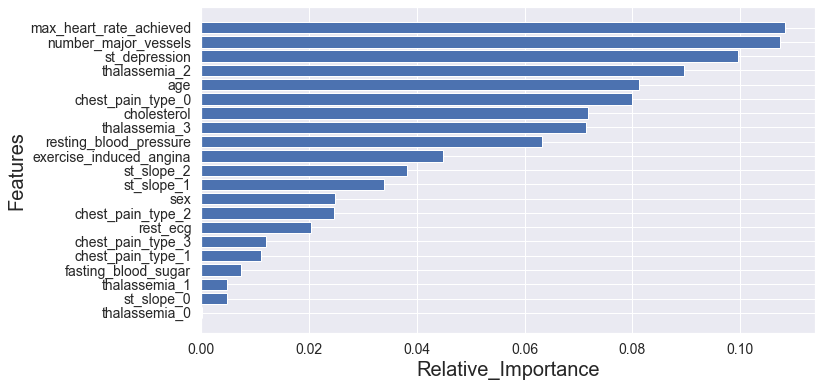

In [330]:
# Plot Feature Importance
Size_Font = 20
Legend_Size_Font = 14
Ticks_Size_Font = 14

fig, ax = plt.subplots(figsize=(11,6))
ax.barh(Name_Column, Score_Column,  align='center')
ax.tick_params( axis='both', labelsize = Ticks_Size_Font)   

ax.invert_yaxis() 
ax.set_xlabel("Relative_Importance",fontsize = Size_Font)
ax.set_ylabel("Features",fontsize = Size_Font)

print("MeanScore", np.mean(FeatureScores_Sorted))

* Only Chest pain type 0 seems to have an influence on classification,
  (0: Typical angina: chest pain related decrease blood supply to the heart), rest is not heart related


## Feature Selection based on Feature Importance (Optional)

In [331]:
#Choose Threshold for Selection of Features
ThresholdforSelection = 0.03

sel = SelectFromModel(forest, prefit = True, threshold=ThresholdforSelection)
FeatureImportance = sel.get_support()
FeatureImportance

array([ True, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True,  True])

In [332]:
Name_Column_sorted = Name_Column.sort_index(ignore_index = True)
Feature_Names_selected= Name_Column_sorted[(sel.get_support())]
print("Length:",len(selected_feat))
print(Feature_Names_selected)

Length: 12
0                         age
2      resting_blood_pressure
3                 cholesterol
6     max_heart_rate_achieved
7     exercise_induced_angina
8               st_depression
9        number_major_vessels
10          chest_pain_type_0
16              thalassemia_2
17              thalassemia_3
19                 st_slope_1
20                 st_slope_2
Name: Feature_Name, dtype: object


In [333]:
# get Indizes of True (important Features)
selected_feat = [i for i, x in enumerate(FeatureImportance) if x]
X_train = X_train[:,[selected_feat]]
X_test = X_test[:,[selected_feat]]


In [334]:
minimal_dims  = X_train.squeeze()
X_train= minimal_dims
minimal_dims  = X_test.squeeze()
X_test= minimal_dims

In [335]:
print(X_train.shape)
print(X_test.shape)

(242, 12)
(61, 12)


## Hyperparameters of the Models

In [234]:
#Support Vector Machine / Logistic Regression
C_range = np.logspace(-5,4,10)
gamma_range = np.logspace(-2, 2, 5)
print(C_range)
print(gamma_range)
#Random Forest
param_range = [1,2,3,4,5]

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [235]:
#Grid Hyperparameter for different Classifiers

#Logistic Regression
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': C_range,
                   'clf__solver': ['liblinear']}] 

#Random Forest
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

#Support Vector Machine
grid_params_svm = [{'clf__kernel': [ 'rbf'], 
                    'clf__C': C_range,
                    'clf__gamma': gamma_range}]

## Function for printing Evaluation Metrics

In [236]:
#prints and returns accuracy of Train/Test Set
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        return (accuracy_score(y_train, pred))
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        return (accuracy_score(y_test, pred))

#class for bold writing
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

## Training of the Models

In [237]:
#Pipline Approach - Train Multiple Classifiers

jobs = -1 # use all processors

# Construct pipelines  (Feature Scaling, Classifier)

#Logistic Regression
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state = 42))])
#Random Forest
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state = 42))])
#Support Vector Machine
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', svm.SVC(random_state = 42))])

# Construct grid searches

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=grid_params_lr,
                     scoring='accuracy',
                     cv=10) 

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring='accuracy',
                     cv=10, 
                     n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params_svm,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=jobs)

# List of pipelines 
grids = [gs_lr, gs_rf,gs_svm]
# gs_rf
# 1: 'Random Forest',
# Dictionary of pipelines and classifier types
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machine'}

In [238]:
best_acc_test = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print(color.BOLD +'Estimator: %s' % grid_dict[idx]+ color.END)
    # Fit grid search	
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    Acc_Score_train = print_score(gs, X_train, y_train, X_test, y_test, train=True)
    Acc_Score_test = print_score(gs, X_train, y_train, X_test, y_test, train=False)
    #Save Results in Dataframe for Anaylsis
    Results_best = pd.DataFrame(data=[[grid_dict[idx], Acc_Score_train, 
                                       Acc_Score_test,len(X_train[1]),ThresholdforSelection ]], 
                                       columns=Colums_Result_df)
    Results_df = Results_df.append(Results_best, ignore_index=True)
    
    
    
    print("_______________________________________________")
    print("_______________________________________________\n")
    if Acc_Score_test > best_acc_test:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Estimator: Logistic Regression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Train Result:
Accuracy Score: 85.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872549    0.850000  0.859504    0.861275      0.860250
recall       0.809091    0.901515  0.859504    0.855303      0.859504
f1-score     0.839623    0.875000  0.859504    0.857311      0.858919
support    110.000000  132.000000  0.859504  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 89  21]
 [ 13 119]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.827586   0.875000  0.852459   0.851293      0.853236
recall      0.857143   0.848485  0.852459   0.852814      0.852459
f1-score    0.842105   0.861538 

In [213]:
print("Summary:\n")
Results_df

Summary:



Model  Training_Accuracy %  Testing_Accuracy %  \
0      Logistic Regression             0.855372            0.836066   
1            Random Forest             0.888430            0.868852   
2   Support Vector Machine             0.867769            0.868852   
3      Logistic Regression             0.855372            0.836066   
4            Random Forest             0.847107            0.819672   
5   Support Vector Machine             0.917355            0.852459   
6      Logistic Regression             0.859504            0.852459   
7            Random Forest             0.888430            0.836066   
8   Support Vector Machine             0.921488            0.885246   
9      Logistic Regression             0.851240            0.819672   
10           Random Forest             0.867769            0.819672   
11  Support Vector Machine             0.958678            0.868852   

   Number_Features Threshold_FeatureImportance  
0               21                           0  
1               21                           0  
2               21                           0  
3               15                       0.019  
4               15                       0.019  
5               15                       0.019  
6               12                        0.03  
7               12                        0.03  
8               12                        0.03  
9               10                        0.04  
10              10                        0.04  
11              10                        0.04

## Plot Evaluation Summary of Models

In [217]:
#Get Values for different Numbers of Features
NF_21 = Results_df.loc[Results_df['Number_Features'] == 21]
NF_15 = Results_df.loc[Results_df['Number_Features'] == 15]
NF_12 = Results_df.loc[Results_df['Number_Features'] == 12]
NF_10 = Results_df.loc[Results_df['Number_Features'] == 10]


[0.8360655737704918, 0.8360655737704918, 0.8524590163934426, 0.819672131147541]
[0.8688524590163934, 0.8524590163934426, 0.8852459016393442, 0.8688524590163934]
[0.8688524590163934, 0.819672131147541, 0.8360655737704918, 0.819672131147541]


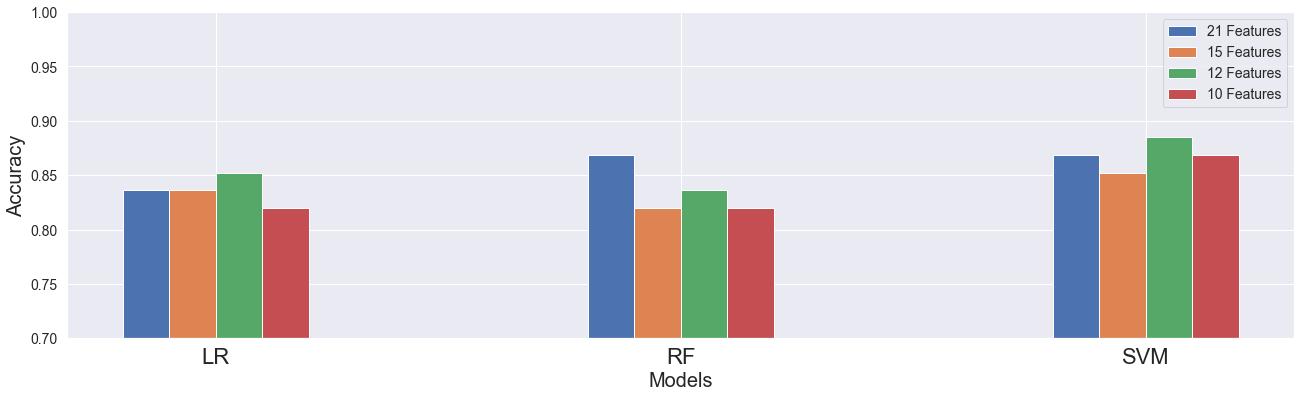

In [337]:
Label_Size = 20
labels = ['LR', 'RF', 'SVM']

Testing_Accuracy_21 = NF_21["Testing_Accuracy %"]
Testing_Accuracy_15 = NF_15["Testing_Accuracy %"]
Testing_Accuracy_12 = NF_12["Testing_Accuracy %"]
Testing_Accuracy_10 = NF_10["Testing_Accuracy %"]

print(Testing_Accuracy_LR)
print(Testing_Accuracy_SVM)
print(Testing_Accuracy_RF)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(22,6))
rects1 = ax.bar(x - 1.5*width, Testing_Accuracy_21, width, label="21 Features")
rects2 = ax.bar(x - 0.5* width, Testing_Accuracy_15, width, label="15 Features")
rects2 = ax.bar(x + 0.5*width, Testing_Accuracy_12, width, label="12 Features")
rects3 = ax.bar(x + 1.5*width, Testing_Accuracy_10, width, label="10 Features")


ax.set_ylabel('Accuracy', fontsize = Label_Size)
ax.set_xlabel('Models', fontsize = Label_Size)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = Label_Size)  
ax.set_ylim([0.7, 1.0])
ax.legend( fontsize = Legend_Size_Font)
plt.tick_params( axis='both', labelsize = Ticks_Size_Font)
plt.tick_params( axis="x", labelsize = 22)


* SVM Model with 12 features has highest accuracy
* This Analysis just focuses on accuracy, other metrics like Recall and Precision should also be considered

In [225]:
#Safe Results to Csv
Results_df.to_csv(r'Results_Models.csv', index = False)

## Further Evaluation of Best Model

In [248]:
#Train best model with optimized parameters
pipe_model = Pipeline([('scl', StandardScaler()),
                    ('clf', svm.SVC(random_state = 42,
                                                   C = 100, 
                                                   gamma = 0.01, 
                                                   kernel = "rbf", 
                                                   probability = True))])
pipe_model.fit(X_train, y_train)
y_predict = pipe_model.predict(X_test)
#get probablities for each sample for class 1                               
y_pred_quant = pipe_model.predict_proba(X_test)[:, 1]
accuracy_score(y_test, y_predict)

0.8852459016393442

## Plot ROC-Curve  (Measuring Peformance of the model)

AUC Value: 0.9004329004329005


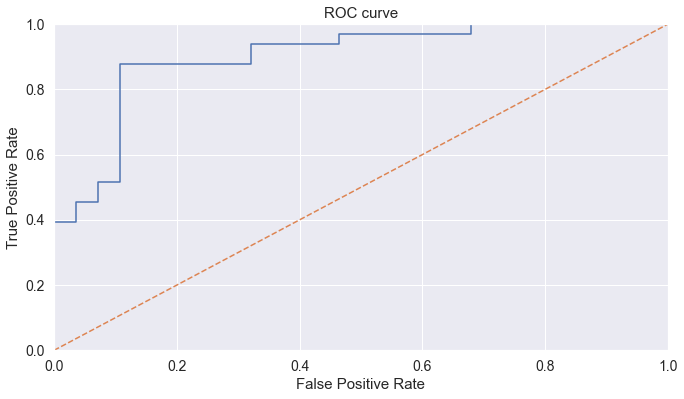

In [249]:
Label_Size = 15
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots(figsize=(11,6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 30
plt.title('ROC curve', fontsize = Label_Size)
plt.xlabel('False Positive Rate', fontsize = Label_Size)
plt.ylabel('True Positive Rate', fontsize = Label_Size) #Recall
ax.tick_params( axis='both', labelsize = Ticks_Size_Font)   

print("AUC Value:",auc(fpr, tpr)) #measure of separability (Chance of model to distinguish between 1 and 0)

# Explain Model and Feature Influence

In [263]:
FeatureNames.tolist()
Feature_Names_selected

0                         age
2      resting_blood_pressure
3                 cholesterol
6     max_heart_rate_achieved
7     exercise_induced_angina
8               st_depression
9        number_major_vessels
10          chest_pain_type_0
16              thalassemia_2
17              thalassemia_3
19                 st_slope_1
20                 st_slope_2
Name: Feature_Name, dtype: object

In [305]:
import eli5 #for purmutation importance 
#randomly shuffles feature column, measures how each shuffeled feature affects accuracy for prediction)
#for more details: https://www.kaggle.com/dansbecker/use-cases-for-model-insights
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(pipe_model, random_state=40).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = Feature_Names_selected.tolist())


# Plot Important Features in PDP Graph

In [306]:
#Add Target to Used Features
UsedFeatures_Target = Feature_Names_selected.append(pd.Series("target"))
UsedFeatures_Target

0                         age
2      resting_blood_pressure
3                 cholesterol
6     max_heart_rate_achieved
7     exercise_induced_angina
8               st_depression
9        number_major_vessels
10          chest_pain_type_0
16              thalassemia_2
17              thalassemia_3
19                 st_slope_1
20                 st_slope_2
0                      target
dtype: object

In [307]:
#Create df with used Features and split Train Test for pdp Plot
#Use pd.df for split (pdp_isolate needs pd.df)
UsedFeatures_df = Df_Dummy.copy()
UsedFeatures_df = UsedFeatures_df[UsedFeatures_Target]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(UsedFeatures_df.drop('target', 1), UsedFeatures_df['target'], test_size = 0.2, random_state=40)


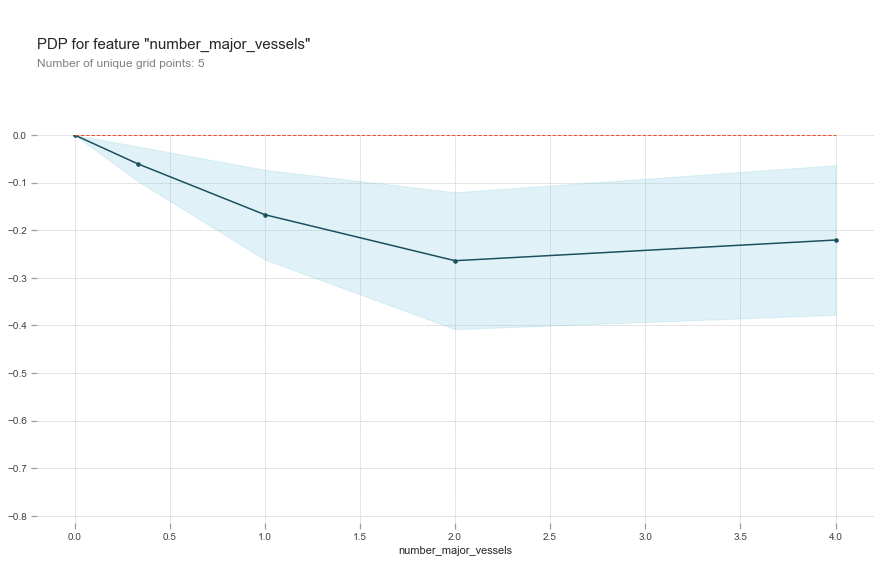

In [308]:
from pdpbox import pdp, info_plots 
#partial dependence plots show, how a feature affects predictions.
base_features = UsedFeatures_df.columns.values.tolist()
base_features.remove('target')

feat_name = 'number_major_vessels'
pdp_dist = pdp.pdp_isolate(model=pipe_model, dataset=X_test_df, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

* more major vessels decrease chance of having HD

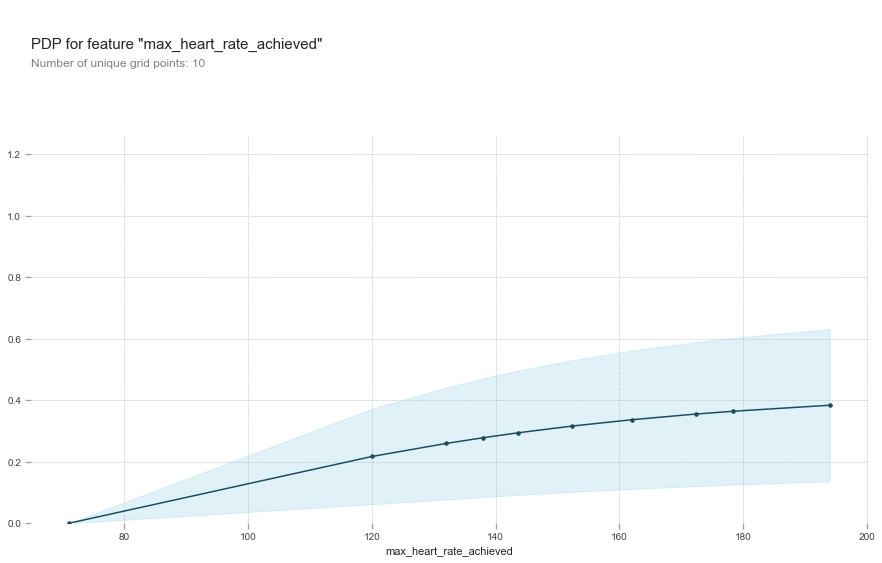

In [310]:
feat_name = 'max_heart_rate_achieved'
pdp_dist = pdp.pdp_isolate(model=pipe_model, dataset=X_test_df, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


* higher maximum heart rate increases chance of having HD